In [11]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [12]:
data = pd.read_csv('spam.csv', usecols = [0,1], encoding='latin-1')
data.columns = ['label', 'text']
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [13]:
data['length'] = data.text.str.len()
data['cat'] = data['label'].map({'ham' : 1, 'spam' : 0})
data

,label,text,length,cat
0,ham,"Go until jurong point, crazy.. Available only ...",111,1
1,ham,Ok lar... Joking wif u oni...,29,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0
3,ham,U dun say so early hor... U c already then say...,49,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,0
6,ham,Even my brother is not like to speak with me. ...,77,1
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,1
8,spam,WINNER!! As a valued network customer you have...,158,0
9,spam,Had your mobile 11 months or more? U R entitle...,154,0


In [ ]:
stop_words = set(stopwords.words('english'))

In [189]:
##remove punc and stop
def remove_punc_stop(text):
    sen = [i for i in text if i not in string.punctuation]
    word = "".join(sen).split()
    word = [i.lower() for i in word if i.lower() not in stopwords.words("english")]
    word = " ".join(word)
    return word

def plot_wordcloud(data, type):
    full_text = ''.join(data['cleaned text'][i] for i in range(len(data)) if data.cat[i] == type)
    wordcloud = WordCloud(max_words = 100, background_color="white").generate(full_text)
    title = ['spam', 'ham']
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{title[type]}', fontsize = 20)

def plot_mostfreq(data, type, mostcommon):
    full = word_tokenize(''.join([data['cleaned text'][i] for i in range(len(data)) if data.cat[i] == type]))
    freq = nltk.FreqDist(full)
    freq.plot(mostcommon, title = (['spam', 'ham'][type]))
    
def plot_mostfreq2(data, type, mostcommon):
    full = word_tokenize(''.join([data['cleaned text'][i] for i in range(len(data)) if data.cat[i] == type]))
    freq = nltk.FreqDist(full)
    dataframe = pd.DataFrame(freq.most_common(mostcommon))
    word = dataframe[0]
    count = dataframe[1]
    sns.barplot(x = word[0:mostcommon], y = count[0:mostcommon], data = dataframe)
    plt.xticks(rotation='vertical')
    plt.title(['spam', 'ham'][type])
    
##
#for i in data.text:
    #data['cleaned text'][k] = remove_punc_stop(i)
    #k += 1

In [ ]:
data['cleaned text'] = data.text.apply(remove_punc_stop)

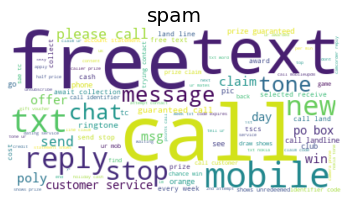

In [75]:
plot_wordcloud(data, 0)

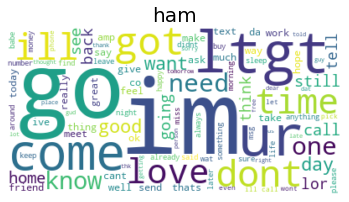

In [77]:
plot_wordcloud(data, 1)

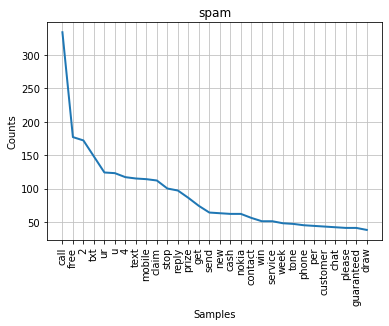

In [158]:
plot_mostfreq(data, 0, 30)

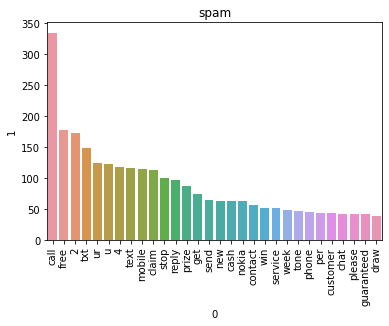

In [192]:
plot_mostfreq2(data, 0, 30)

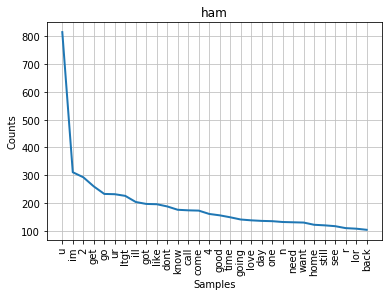

In [154]:
plot_mostfreq(data, 1, 30)

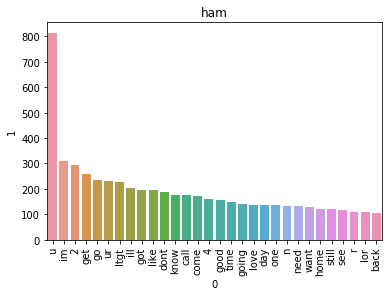

In [191]:
plot_mostfreq2(data, 1, 30)

## Vectorizing

In [250]:
##counting the occurrences of tokens in each document.
vectorizer = CountVectorizer()
data_X = vectorizer.fit_transform(data['cleaned text'])

##To avoid these potential discrepancies it suffices to divide the number of occurrences 
##of each word in a document by the total number of words in the document: 
##these new features are called tf for Term Frequencies.
vectorizer2 = TfidfVectorizer()
data_X2 = vectorizer2.fit_transform(data['cleaned text'])

dictionary = np.array(vectorizer.get_feature_names())
dictionary2 = np.array(vectorizer2.get_feature_names())


In [251]:
##nonzero term in data
print(data_X.nnz)
##% of nonzero term
(data_X.nnz)/(data_X.shape[0]*data_X.shape[1])*100

47254


0.09045027061195789

In [252]:
##nonzero term in data
print(data_X2.nnz)
##% of nonzero term
(data_X2.nnz)/(data_X2.shape[0]*data_X2.shape[1])*100

47254


0.09045027061195789

In [255]:
data_X.shape

(5572, 9376)

In [253]:
data_X2.shape

(5572, 9376)

In [209]:
print(len(vectorizer.vocabulary_))

9376


In [242]:
text = data['cleaned text'][4]
text

'nah dont think goes usf lives around though'

In [235]:
test = vectorizer.transform([text])
print(test)

  (0, 1305)	1
  (0, 2902)	1
  (0, 3778)	1
  (0, 5010)	1
  (0, 5637)	1
  (0, 8227)	1
  (0, 8246)	1
  (0, 8667)	1


In [236]:
test.nonzero()[1]

array([1305, 2902, 3778, 5010, 5637, 8227, 8246, 8667])

In [241]:
dictionary = np.array(vectorizer.get_feature_names())
c[np.array(test.nonzero()[1])]

array(['around', 'dont', 'goes', 'lives', 'nah', 'think', 'though', 'usf'],
      dtype='<U48')

In [246]:
5572* 9376

52243072